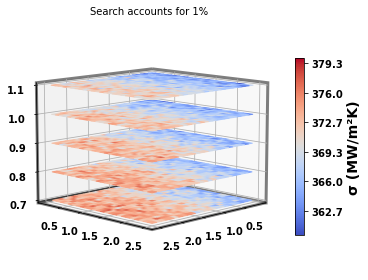

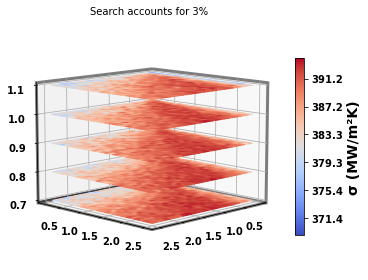

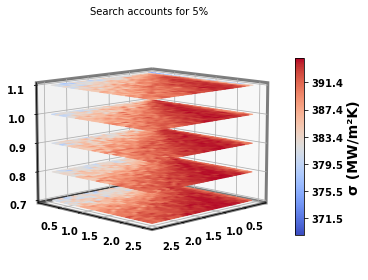

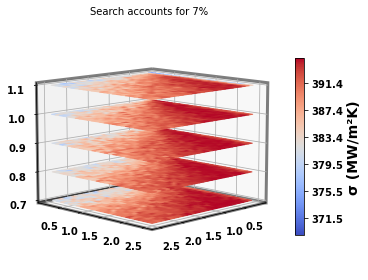

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

csv_name = [
    'mean0.01',#0.01
    'mean0.03',#0.03
    'mean0.05',#0.05
    'mean0.07',#0.07
]

accounts_list = [
    '1%',   #0.01
    '3%',   #0.03
    '5%',   #0.05
    '7%',   #0.07
]

def csv2array(csv):

    csvname = csv + '.csv'
    df = pd.read_csv(csvname, index_col=0)
    shape = (int(df['w_index'].max()) + 1, int(df['c1_index'].max()) + 1, int(df['c2_index'].max()) + 1)
    array_3d = np.zeros(shape, dtype=float)
    for index, row in df.iterrows():
        array_3d[int(row['w_index']), int(row['c1_index']), int(row['c2_index'])] = row['ITC']
        
    return array_3d


def plot(index,array_3d):

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    w, c1, c2 = array_3d.shape
    min_value = np.min(array_3d)
    max_value = np.max(array_3d)

    for i in range(6,11,1):
        slice_2d = array_3d[i, :, :]
        x, y = np.meshgrid(range(c1), range(c2))
        colorvalue = (slice_2d-min_value)/(max_value-min_value)
        ax.plot_surface(x, y, np.full_like(slice_2d, i), facecolors=plt.cm.coolwarm(colorvalue), shade=False)
    
    ax.set_xticks([4, 9, 14, 19, 24])
    ax.set_xticklabels(['0.5', '1.0', '1.5', '2.0', '2.5'])

    ax.set_yticks([4, 9, 14, 19, 24])
    ax.set_yticklabels(['0.5', '1.0', '1.5', '2.0', '2.5'])
    
    ax.set_zticks([6, 7, 8, 9, 10])
    ax.set_zticklabels(['0.7', '0.8', '0.9', '1.0', '1.1'])

    x_axis = ax.get_xaxis()
    y_axis = ax.get_yaxis()
    z_axis = ax.get_zaxis()

    for label in x_axis.get_ticklabels():
        label.set_fontweight('bold')

    for label in y_axis.get_ticklabels():
        label.set_fontweight('bold')

    for label in z_axis.get_ticklabels():
        label.set_fontweight('bold')
    
    ax.view_init(elev=10, azim=45)
    plt.title('Search accounts for ' + accounts_list[index], fontsize=10)

    mappable = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm)
    mappable.set_array(colorvalue)
    cbar = plt.colorbar(mappable, ax=ax, orientation='vertical', aspect=18, shrink=0.7)    
    
    tick_values = np.linspace(0, 1, num=9)
    
    tick_labels = []
    for tick_labels_index, tick_label in enumerate(tick_values):
        tick_label_ITC = tick_label*(max_value-min_value)+min_value
        tick_labels.append('{:.1f}'.format(tick_label_ITC))
    
    cbar.set_ticks(tick_values)
    cbar.set_ticklabels(tick_labels)
    cbar.ax.set_yticklabels(tick_labels, fontsize=10, fontweight='bold')
    cbar.set_label('σ (MW/m²K)', fontsize=14, fontweight='bold')

    ax.xaxis.pane.set_edgecolor('black')
    ax.yaxis.pane.set_edgecolor('black')
    ax.zaxis.pane.set_edgecolor('black')

    ax.xaxis.pane.set_linewidth(3)
    ax.yaxis.pane.set_linewidth(3)
    ax.zaxis.pane.set_linewidth(3)

    figname = str(index+1)+'global_3d.jpg'
    plt.savefig(figname,dpi=500)
    plt.tight_layout()
    plt.show()
    
for index, csv in enumerate(csv_name):
    plot(index,csv2array(csv))